not yet
done


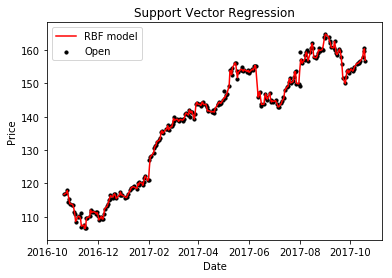

In [2]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
import matplotlib.pyplot as plt

dates = None
prices = None
csvStockData = None


def get_stock_data(quote):
    url = 'http://www.google.com/finance/historical?q=NASDAQ%3A'+quote+'&output=csv'
    csvStockData = pd.read_csv(url)
    dates = pd.to_datetime(csvStockData['Date'])
    prices = csvStockData['Open']
    return dates, prices
    
def plot_figure(dates, prices):
    plt.scatter(list(dates), prices, s=10, c='black')
    plt.show()

stock_quote = 'AAPL' #input('Enter a stock quote from NASDAQ (e.j: AAPL, FB, GOOGL): ').upper() 
dates, prices = get_stock_data(stock_quote)

X = dates.apply(lambda x: x.toordinal()).values.reshape(-1,1)
Y = prices
#print(X)
#svr_lin = SVR(kernel='linear', C=1000)
svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1)
print('not yet')
#svr_lin.fit(X, Y)
svr_rbf.fit(X, Y)
print('done')
#plt.plot(X,svr_lin.predict(X), color= 'green', label= 'Linear model')
plt.plot(dates.values.reshape(-1,1), svr_rbf.predict(X), color= 'red', label= 'RBF model')
plt.scatter(dates.values.reshape(-1,1), Y, s=10, c='black')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

#plot_figure(dates, prices)
#print(prices)

In [ ]:
import pandas_datareader.data as web

gs = web.DataReader("GS", data_source='yahoo', start='2006-01-01', end='2010-01-01')
gs.head().round(2)

In [ ]:
df = pd.read_csv('test.csv')
df['date'] = pd.to_datetime(df['date'])    
df['date_delta'] = (df['date'] - df['date'].min())  / np.timedelta64(1,'D')
city_data = df[df['city'] == 'London']
result = sm.ols(formula = 'sales ~ date_delta', data = city_data).fit()

In [ ]:
# 1. install dependecies
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
# 2. collect dataset from finance.gooogle.com https://finance.google.com/finance/historical?q=NASDAQ:AAPL

# 3. write script

dates = []
prices = []

def get_data(filename):
    with open(filename, 'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader)
        for row in csvFileReader:
            dates.append(int(row[0].split('-')[0]))
            prices.append(float(row[1]))
    return
print(np.array([dates]).shape)

def predict_prices(dates, prices, x):
    dates = np.reshape(dates, (len(dates),1))
    
    svr_lin = SVR(kernel='linear', C=1e3)
    
    svr_lin.fit(dates, prices)
    
    plt.scatter(dates, prices, color='black', label='Data points')
    plt.plot(dates, svr_lin.predict(dates), color='red', label='Linear model')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
    
    return svr_lin.predict(x)[0]

get_data('aapl.csv')
predicted = predict_prices(dates, prices, 29)
print(predicted)

# 4. analyze graph

In [ ]:
import csv
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt


#plt.switch_backend('newbackend')  



dates = []
prices = []

def get_data(filename):
    with open(filename, 'r') as csvfile:
        csvFileReader = csv.reader(csvfile)
        next(csvFileReader)	# skipping column names
        for row in csvFileReader:
            dates.append(int(row[0].split('-')[0]))
            prices.append(float(row[1]))
    return

def predict_price(dates, prices, x):
    dates = np.reshape(dates,(len(dates), 1)) # converting to matrix of n X 1

    svr_lin = SVR(kernel= 'linear', C= 1e3)
    #svr_poly = SVR(kernel= 'poly', C= 1e3, degree= 2)
    #svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1) # defining the support vector regression models
    #svr_rbf.fit(dates, prices) # fitting the data points in the models
    svr_lin.fit(dates, prices)
    #svr_poly.fit(dates, prices)

    plt.scatter(dates, prices, color= 'black', label= 'Data') # plotting the initial datapoints 
    #plt.plot(dates, svr_rbf.predict(dates), color= 'red', label= 'RBF model') # plotting the line made by the RBF kernel
    plt.plot(dates,svr_lin.predict(dates), color= 'green', label= 'Linear model') # plotting the line made by linear kernel
    #plt.plot(dates,svr_poly.predict(dates), color= 'blue', label= 'Polynomial model') # plotting the line made by polynomial kernel
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()

    return svr_lin.predict(x)[0]#, svr_rbf.predict(x)[0], svr_poly.predict(x)[0]

get_data('aapl.csv') # calling get_data method by passing the csv file to it
#print "Dates- ", dates
#print "Prices- ", prices

predicted_price = predict_price(dates, prices, 29)
print(predicted_price)